In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
!pip install amazon_product_review_scraper

  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13503 sha256=4a41221c437d6ab48a171a707054e785d84f60c6958bfc1ac22c4add7f88ca60
  Stored in directory: /root/.cache/pip/wheels/ed/f7/62/50ab6c9a0b5567267ab76a9daa9d06315704209b2c5d032031
Successfully built fake-useragent


In [6]:
from amazon_product_review_scraper import amazon_product_review_scraper

In [7]:
review_scraper=amazon_product_review_scraper(amazon_site='amazon.in',product_asin='B07NGTRRPN')

Total reviews (all pages): 3629


In [8]:
reviewsdf=review_scraper.scrape()

Total pages: 363
Start page: 1; End page: 363

Started!


Not able to scrape page 139 (CAPTCHA is not bypassed)
Not able to scrape page 154 (CAPTCHA is not bypassed)
Not able to scrape page 322 (CAPTCHA is not bypassed)
Not able to scrape page 334 (CAPTCHA is not bypassed)

Completed!


In [9]:
reviewsdf.shape

(3589, 5)

In [10]:
reviewsdf.head()

,date_info,name,title,content,rating
0,Reviewed in India on 4 June 2019,Ashish Dayal,BEWARE!! THIS BLADE IS MADE TO MAKE MORE PROFI...,1. The replacement blade is around Rs.800/- an...,1.0 out of 5 stars
1,Reviewed in India on 29 October 2019,Shayantan's Tech,"Gillette killer for sure, can give a tough fig...","I received this on March 25, 2019. I haven't c...",4.0 out of 5 stars
2,Reviewed in India on 23 June 2019,Rohit iyer,Avoid this because its very fragile,I would absolutely avoid buying this.. Even th...,4.0 out of 5 stars
3,Reviewed in India on 4 May 2019,Trimmers forever,Perfect for bearded men; a little time consumi...,I purchased the OneBlade so that I can control...,4.0 out of 5 stars
4,Reviewed in India on 7 August 2019,Pushkar,BEWARE!! POOR BLADE AND THIS BLADE IS MADE TO ...,First impressions:. This product looks good. G...,1.0 out of 5 stars


In [11]:
#content part is the hole review part
onebladereviews=reviewsdf.content

In [12]:
# converting to DataFrame
onebladereviews=pd.DataFrame(onebladereviews)

In [13]:
onebladereviews.dtypes

content    object
dtype: object

In [16]:
from textblob import TextBlob

In [18]:
#functions_sentiment analyzer this polarity assigns the value based on content
def analyze_sentiment(tweet):
  analysis=TextBlob(tweet)
  if analysis.sentiment.polarity>0:
    return 'Positive'
  elif analysis.sentiment.polarity==0:
    return 'Neutral'
  else:
    return 'Negative' 

In [19]:
onebladereviews['sentiment']=[str(analyze_sentiment(x)) for x in onebladereviews['content']]

In [22]:
onebladereviews.sentiment.value_counts()

Positive    2581
Negative     561
Neutral      447
Name: sentiment, dtype: int64

In [23]:
#Sentences-For Sentiment Analysis are required as input.
#words-Break sentences to words to use words as input for frequency analysis, word cloud,etc;
#Trem Frequency Inverse Document Frequency(TFIDF)- Matrix of words and frequency of words. Input is words.


In [28]:
from wordcloud import WordCloud,STOPWORDS

In [29]:
comment_words=''
stopwords=set(STOPWORDS)
for val in onebladereviews.content:
  val=str(val)
  tokens=val.split()#splitting into tokens(words) based on spaces
  for i in range(len(tokens)):
    tokens[i]=tokens[i].lower()#converting all tokens into lower case
  comment_words +=" ".join(tokens)+" " 


In [30]:
comment_words

'1. the replacement blade is around rs.800/- and if you use this daily you may have to replace the blade on the 3rd or 2nd month.. 2. it\'s just a trimmer, you have to slide the blade multiple times to get a very clean shave then also you\'ll not be able to get a clean shave like aquatouch or your normal hand held manual blade.. 3. the pack and the advertisement mentions that the battery lasts for 90 mins in one single charge, but you have to charge it for 8 hours to get it all juiced up and then on a single shave you\'ll spend atleast 15-20mins to get a clean shave because of it\'s i\'ll designed blade system. i received this on march 25, 2019. i haven\'t changed the blade.. its 8 months still working fine.. the flexibility has improved too. the product needs to have a better battery life as blades become old, it takes a toll on battery life significantly.. the blades haven\'t turned green yet.. about durability, sometimes the trimmer head felt delicate. the mechanics can be improved.

In [32]:
wordcloud=WordCloud(width=800,height=400,background_color='White',
                    stopwords=stopwords,
                    min_font_size=10).generate(comment_words)

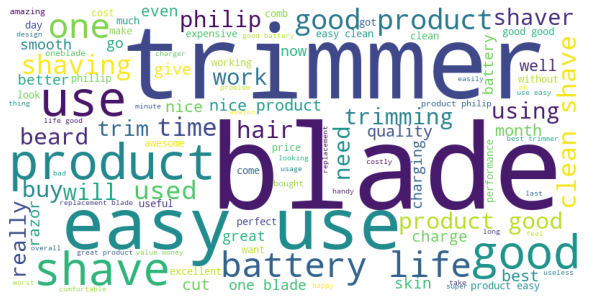

In [34]:
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()